In [1]:
import pandas as pd
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Desktop\SP.csv", parse_dates=True, index_col="交易日期")

In [3]:
# Check for NaN values in the dataset
nan_info = df.isna().sum()

# Display information about NaN values in each column
nan_info[nan_info > 0]

Series([], dtype: int64)

In [4]:
# Check for zero prices in the dataset
zero_price_info = (df == 0).sum()

# Display information about zero prices in each column
zero_price_info[zero_price_info > 0]

REL.L    24
dtype: int64

In [5]:
# Check for zero prices in the dataset and replace them with the nearest non-zero value using forward fill
df_filled = df.replace(0, pd.NA).fillna(method='ffill')

# Calculate daily returns as percentage change
daily_returns = df_filled.iloc[:, 1:].pct_change()

# Display the first few rows of the daily returns dataframe
daily_returns.head()

,PNDORA.CO,VWS.CO,MAERSKa.CO,STN.TO,LUN.TO,SASA.IS,SAHOL.IS,MYTr.AT,TLXGn.DE,ALVG.DE,...,SCAb.ST,ABBN.S,MSFT.OQ,MRK.N,LIN.OQ,REL.L,FER.MC,EDPR.LS,BBVA.MC,IBE.MC
交易日期,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.028577,0.001805,0.023575,-0.019927,0.007890,0.000000,0.000000,-0.013118,-0.002857,0.002884,...,-0.035011,0.010503,0.001087,-0.008082,0.011883,0.003690,-0.000465,-0.008412,-0.001642,-0.002674
2019-01-04,0.007422,0.012012,-0.013054,-0.006224,0.003914,0.055556,0.029197,-0.004090,0.001823,0.000584,...,0.004535,0.001641,0.020994,0.013405,0.010740,-0.013787,-0.007911,0.029692,-0.024671,-0.001340
2019-01-07,-0.007367,-0.010682,-0.004595,0.007516,0.007797,0.000000,-0.007092,0.009240,0.001300,-0.005209,...,0.002257,0.008738,0.007002,0.004409,0.006072,0.006058,-0.009381,0.005149,0.001686,0.001342
2019-01-08,-0.001713,-0.001800,0.008445,-0.007874,-0.054159,-0.052632,-0.014286,0.001017,0.000779,0.003972,...,-0.010135,0.001083,0.007745,0.004648,0.012013,0.008337,-0.006155,-0.008197,-0.008418,0.005362


In [6]:
daily_returns

,PNDORA.CO,VWS.CO,MAERSKa.CO,STN.TO,LUN.TO,SASA.IS,SAHOL.IS,MYTr.AT,TLXGn.DE,ALVG.DE,...,SCAb.ST,ABBN.S,MSFT.OQ,MRK.N,LIN.OQ,REL.L,FER.MC,EDPR.LS,BBVA.MC,IBE.MC
交易日期,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.028577,0.001805,0.023575,-0.019927,0.007890,0.000000,0.000000,-0.013118,-0.002857,0.002884,...,-0.035011,0.010503,0.001087,-0.008082,0.011883,0.003690,-0.000465,-0.008412,-0.001642,-0.002674
2019-01-04,0.007422,0.012012,-0.013054,-0.006224,0.003914,0.055556,0.029197,-0.004090,0.001823,0.000584,...,0.004535,0.001641,0.020994,0.013405,0.010740,-0.013787,-0.007911,0.029692,-0.024671,-0.001340
2019-01-07,-0.007367,-0.010682,-0.004595,0.007516,0.007797,0.000000,-0.007092,0.009240,0.001300,-0.005209,...,0.002257,0.008738,0.007002,0.004409,0.006072,0.006058,-0.009381,0.005149,0.001686,0.001342
2019-01-08,-0.001713,-0.001800,0.008445,-0.007874,-0.054159,-0.052632,-0.014286,0.001017,0.000779,0.003972,...,-0.010135,0.001083,0.007745,0.004648,0.012013,0.008337,-0.006155,-0.008197,-0.008418,0.005362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.007654,0.019332,0.024790,-0.005951,-0.025516,-0.043478,-0.035398,-0.002715,-0.010528,-0.004845,...,-0.004602,-0.003895,0.007879,0.009776,0.006817,0.001026,-0.000280,0.000512,-0.014333,-0.008621
2023-12-26,-0.014762,0.024138,0.058166,0.024466,0.027431,-0.007576,-0.032110,-0.009404,0.000280,0.008039,...,0.009247,0.001610,0.002998,0.011655,0.001955,0.012039,0.007289,0.041944,0.014541,0.015020
2023-12-27,0.008364,0.053535,-0.037515,0.011433,0.013350,-0.053435,-0.018957,0.016737,0.009237,0.004717,...,-0.003272,0.016073,-0.001575,0.003252,0.003122,0.000000,0.010854,0.010309,0.008820,0.006231


In [7]:
from pypfopt import HRPOpt

In [8]:
from pypfopt import expected_returns

rets = expected_returns.returns_from_prices(df_filled)
rets.tail()

,600438.SS,PNDORA.CO,VWS.CO,MAERSKa.CO,STN.TO,LUN.TO,SASA.IS,SAHOL.IS,MYTr.AT,TLXGn.DE,...,SCAb.ST,ABBN.S,MSFT.OQ,MRK.N,LIN.OQ,REL.L,FER.MC,EDPR.LS,BBVA.MC,IBE.MC
交易日期,,,,,,,,,,,,,,,,,,,,,
2023-12-22,0.015291,0.007654,0.019332,0.024790,-0.005951,-0.025516,-0.043478,-0.035398,-0.002715,-0.010528,...,-0.004602,-0.003895,0.007879,0.009776,0.006817,0.001026,-0.000280,0.000512,-0.014333,-0.008621
2023-12-26,0.000000,-0.014762,0.024138,0.058166,0.024466,0.027431,-0.007576,-0.032110,-0.009404,0.000280,...,0.009247,0.001610,0.002998,0.011655,0.001955,0.012039,0.007289,0.041944,0.014541,0.015020
2023-12-27,-0.012048,0.008364,0.053535,-0.037515,0.011433,0.013350,-0.053435,-0.018957,0.016737,0.009237,...,-0.003272,0.016073,-0.001575,0.003252,0.003122,0.000000,0.010854,0.010309,0.008820,0.006231
2023-12-28,0.094512,-0.007285,0.019815,-0.014671,0.003642,-0.019162,0.008065,0.009662,-0.003931,-0.016919,...,-0.001970,-0.008362,0.003235,0.007316,-0.003502,-0.003543,-0.000275,-0.004859,-0.009836,-0.004644
2023-12-29,-0.016713,0.003924,-0.005641,0.010281,0.005131,-0.001221,-0.008000,-0.019139,-0.000987,0.006489,...,-0.012500,0.010255,0.002025,0.002298,0.002294,0.005588,0.003580,-0.001953,0.002208,0.001555


In [9]:
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('600438.SS', 0.02111),
             ('PNDORA.CO', 0.01383),
             ('VWS.CO', 0.00831),
             ('MAERSKa.CO', 0.01714),
             ('STN.TO', 0.05479),
             ('LUN.TO', 0.01595),
             ('SASA.IS', 0.01398),
             ('SAHOL.IS', 0.02758),
             ('MYTr.AT', 0.04516),
             ('TLXGn.DE', 0.01859),
             ('ALVG.DE', 0.03123),
             ('SIEGn.DE', 0.0156),
             ('CBKG.DE', 0.00726),
             ('IFXGn.DE', 0.00969),
             ('CRDI.MI', 0.02507),
             ('6501.T', 0.05051),
             ('SGOB.PA', 0.01429),
             ('HRMS.PA', 0.02049),
             ('SCHN.PA', 0.01828),
             ('DAST.PA', 0.01922),
             ('ATCOa.ST', 0.00612),
             ('EPIRa.ST', 0.0062),
             ('VOLVb.ST', 0.01207),
             ('LIFCOb.ST', 0.00929),
             ('INDT.ST', 0.00939),
             ('ATCOb.ST', 0.04506),
             ('SCAb.ST', 0.03189),
             ('ABBN.S', 0.04477),
          

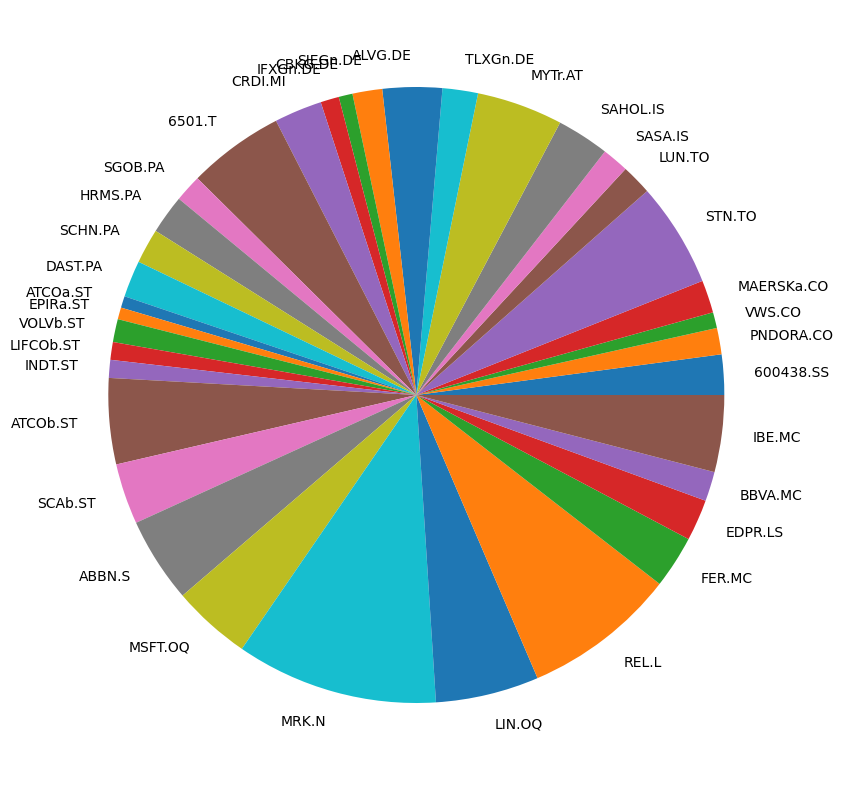

In [10]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [11]:
hrp.portfolio_performance(verbose=True)

Expected annual return: 20.2%
Annual volatility: 9.3%
Sharpe Ratio: 1.97


(0.20231512758455908, 0.09272224955426124, 1.9662500474372973)

D:\Python\Install\Lib\site-packages\pypfopt\plotting.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Axes: >

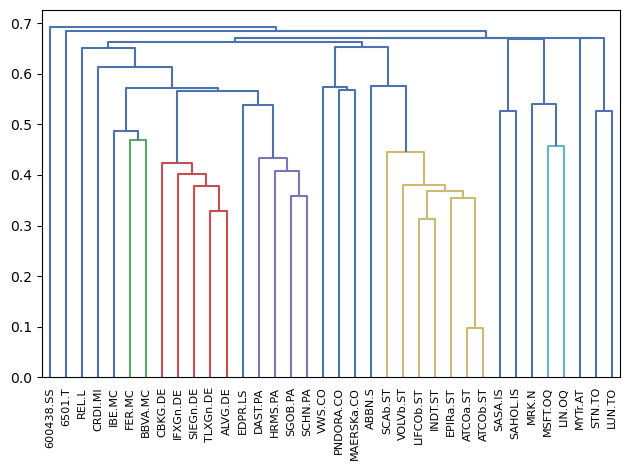

In [12]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp)

# Portfolio Construction

In [13]:
portfolio_daily_returns = (daily_returns * pd.Series(weights)).sum(axis=1)

portfolio_daily_returns.head()

交易日期
2019-01-02    0.000000
2019-01-03   -0.001101
2019-01-04    0.006129
2019-01-07    0.002261
2019-01-08    0.001986
dtype: float64

In [14]:
import yfinance as yf
# Define the stock ticker symbol for the ACWI ETF
ticker_symbol = "ACWI"

# Define the start and end dates for the time period
start_date = "2019-01-01"
end_date = "2024-01-01"

# Download the stock price data using yfinance
acwi_stock_price = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows of the dataframe
print(acwi_stock_price.tail())

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-22  101.150002  101.470001  100.800003  101.180000  101.180000   
2023-12-26  101.400002  101.839996  101.300003  101.669998  101.669998   
2023-12-27  101.720001  102.029999  101.599998  101.959999  101.959999   
2023-12-28  102.129997  102.279999  101.910004  101.959999  101.959999   
2023-12-29  101.970001  102.150002  101.480003  101.769997  101.769997   

             Volume  
Date                 
2023-12-22  3520000  
2023-12-26  3021300  
2023-12-27  3906000  
2023-12-28  3909100  
2023-12-29  3341500  


In [15]:
# Calculate the daily returns of the close prices
acwi_daily_returns = acwi_stock_price['Close'].pct_change()

# Remove other columns, retaining only the 'Close' column
acwi_stock_price = acwi_stock_price[['Close']]

# Combine the two lines for succinctness
acwi_stock_price['Daily Return'] = acwi_stock_price['Close'].pct_change()

# Now 'acwi_stock_price' DataFrame has only two columns: 'Close' and 'Daily Return'
# If you want to keep only 'Daily Return', you can do:
acwi_stock_price = acwi_stock_price[['Daily Return']]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20204\32684969.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acwi_stock_price['Daily Return'] = acwi_stock_price['Close'].pct_change()


In [16]:
print(acwi_stock_price.tail())

            Daily Return
Date                    
2023-12-22      0.001485
2023-12-26      0.004843
2023-12-27      0.002852
2023-12-28      0.000000
2023-12-29     -0.001863


In [17]:
import quantstats as qs

                           Benchmark    Portfolio
-------------------------  -----------  -----------
Start Period               2019-01-03   2019-01-03
End Period                 2023-12-29   2023-12-29
Risk-Free Rate             3.5%         3.5%
Time in Market             98.0%        94.0%

Cumulative Return          58.67%       164.57%
CAGR﹪                     6.6%         14.41%

Sharpe                     0.38         1.75
Prob. Sharpe Ratio         50.08%       99.95%
Smart Sharpe               0.33         1.51
Sortino                    0.52         2.53
Smart Sortino              0.45         2.18
Sortino/√2                 0.37         1.79
Smart Sortino/√2           0.32         1.54
Omega                      1.37         1.37

Max Drawdown               -33.53%      -21.84%
Longest DD Days            773          344
Volatility (ann.)          19.87%       9.22%
R^2                        0.0          0.0
Information Ratio          0.02         0.02
Calmar             

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2019-11-27,2020-02-10,2020-05-18,174,-21.840734,-21.406170
2,2021-12-06,2022-09-05,2022-11-14,344,-20.256585,-19.615493
3,2023-07-24,2023-10-25,2023-11-15,115,-8.207757,-8.180091
4,2021-07-20,2021-08-20,2021-09-16,59,-4.578726,-4.551460
5,2021-10-13,2021-11-09,2021-12-01,50,-3.849246,-3.818276


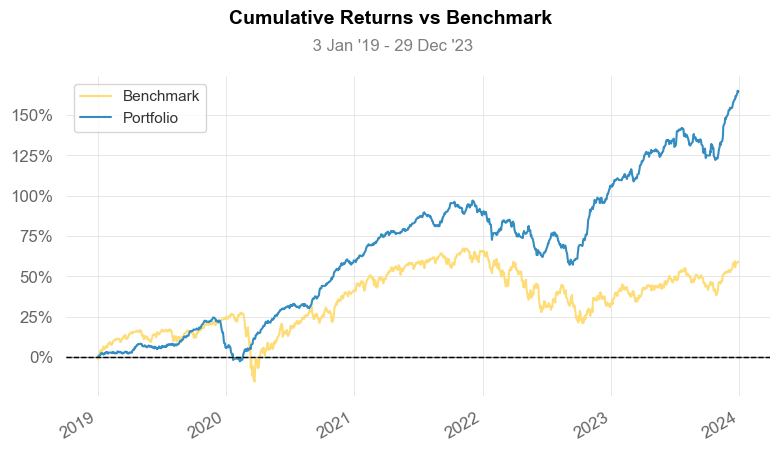

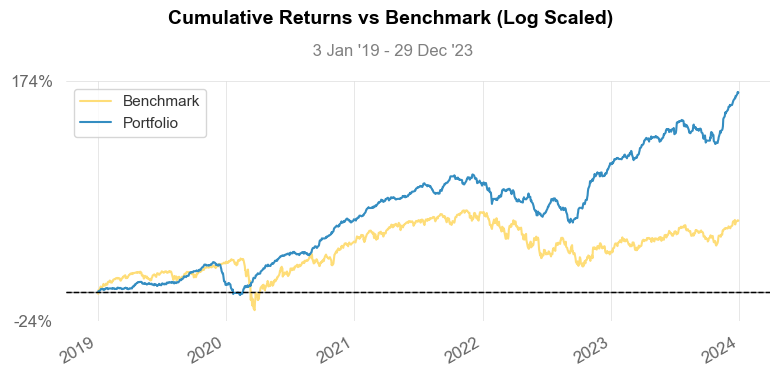

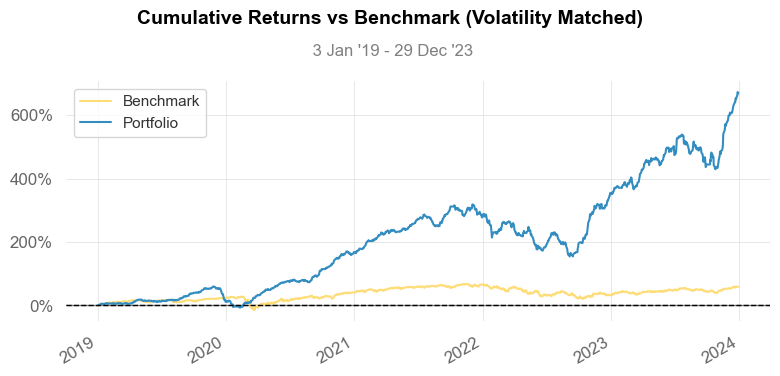

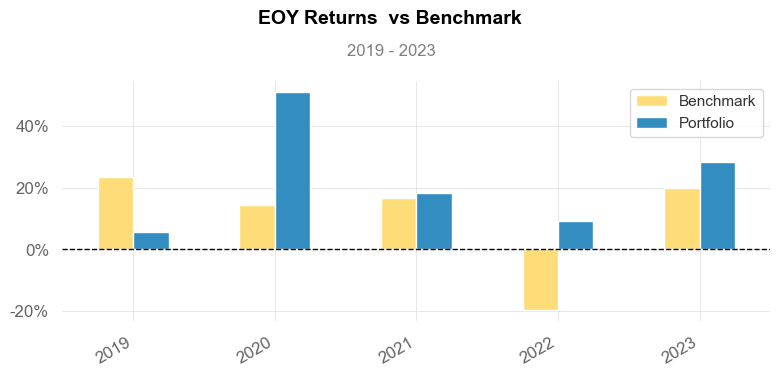

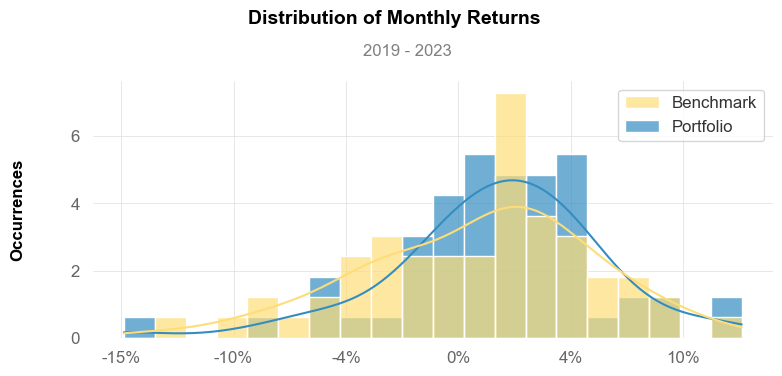

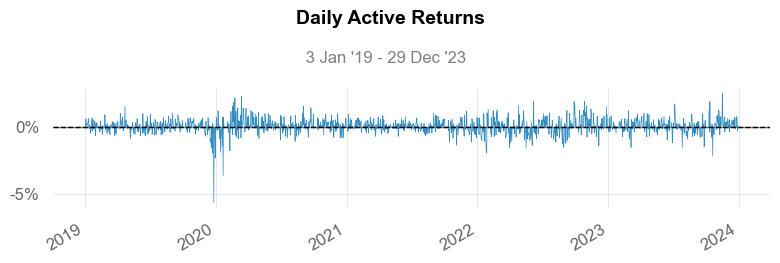

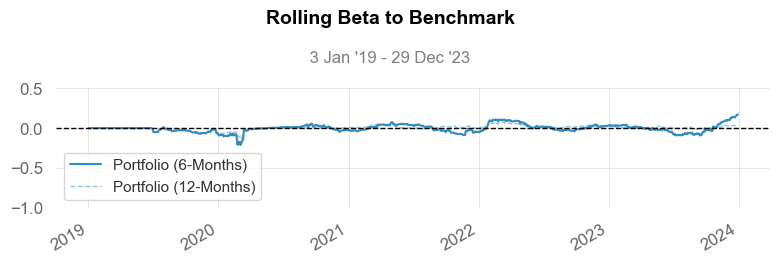

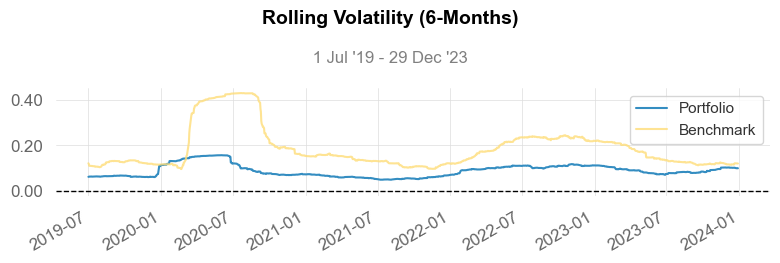

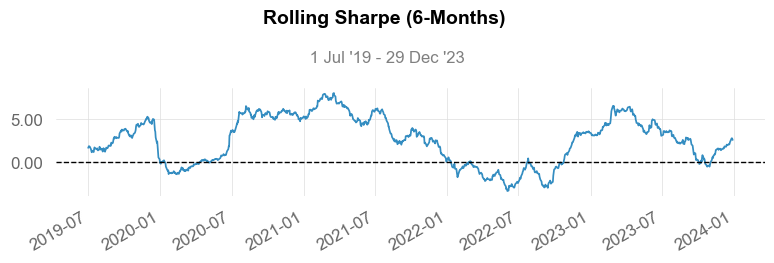

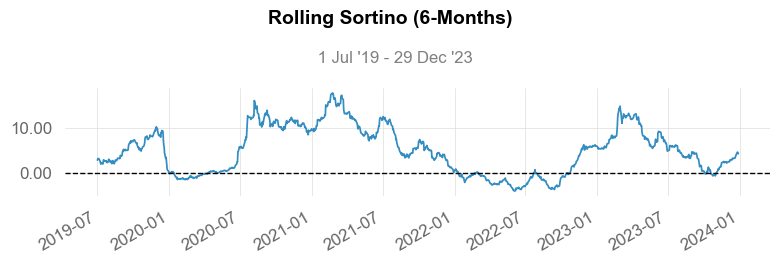

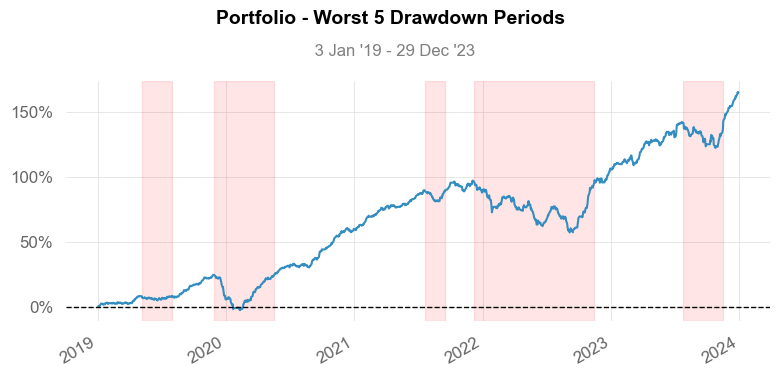

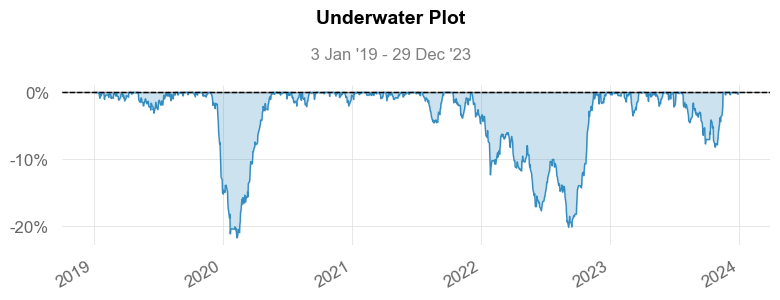

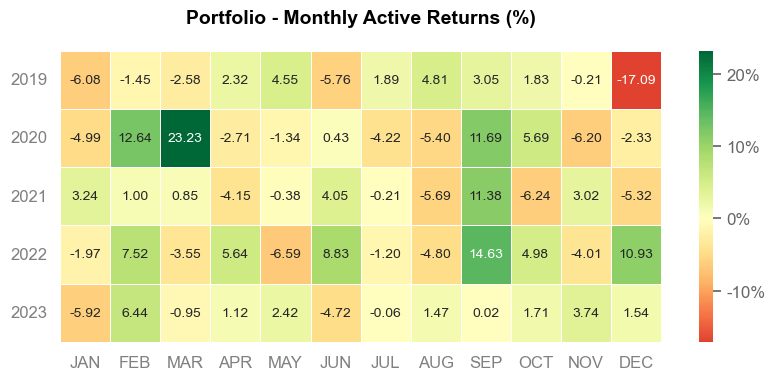

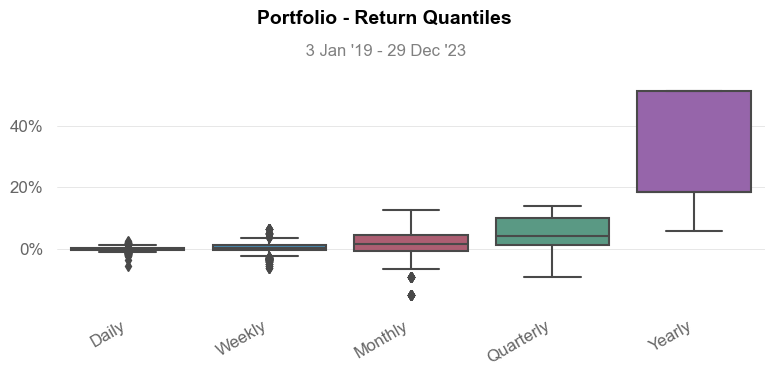

In [18]:
qs.reports.full(portfolio_daily_returns, benchmark=acwi_stock_price, rf=0.035, strategy_title="Portfolio", benchmark_title="Benchmark")

In [19]:
portfolio_daily_returns.fillna(method='ffill', inplace=True)
acwi_stock_price.fillna(method='ffill', inplace=True)

In [20]:
# Assuming 'portfolio_daily_returns' and 'benchmark_data' are pandas Series
report = qs.reports.html(portfolio_daily_returns, acwi_stock_price, rf=0.035, strategy_title="Portfolio", benchmark_title="Benchmark", output='report.html')